# IPL DATA ANALYSIS(2008-17)


In [1]:
#importing req librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

from warnings import filterwarnings
filterwarnings("ignore")

In [71]:
#importing the data 

ipl_data=pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\python\IPL data analysis/deliveries.csv")
ipl_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
#indepth Analysis of CH Gayle Performance
ipl_data["batsman"].unique()
filt=(ipl_data["batsman"]=="CH Gayle")
df_Gayle=ipl_data[filt]
df_Gayle.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
131,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
132,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
133,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
137,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


Text(0.5, 1.0, 'Gayles dismissal kind')

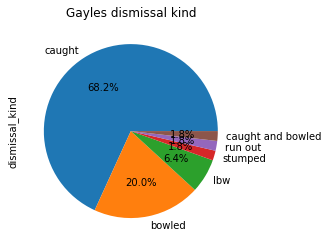

In [4]:
#seeing dismissal kind of gayle
df_Gayle["dismissal_kind"].value_counts()

#ploting pie plot 
df_Gayle["dismissal_kind"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Gayles dismissal kind")

In [5]:
#no of 6s by Gayle

len(df_Gayle[df_Gayle["batsman_runs"]==6])

327

In [6]:
#no of 6s by Gayle

len(df_Gayle[df_Gayle["batsman_runs"]==4])

376

In [7]:
# no of 3s by Gayle
len(df_Gayle[df_Gayle["batsman_runs"]==3])

3

In [8]:
# no of 2s by Gayle
len(df_Gayle[df_Gayle["batsman_runs"]==2])

83

In [9]:
# no of 1s by Gayle
len(df_Gayle[df_Gayle["batsman_runs"]==1])

919

In [10]:
#total runs made by Gayle

df_Gayle["total_runs"].sum()

4873

In [11]:
#seeing the how Gayle make runs 
def count(ipl_data,runs):
    return len(df_Gayle[df_Gayle["batsman_runs"]==runs])*runs


In [12]:
# score by singles 
count(df_Gayle,1)

919

In [13]:
#score by doubles
count(df_Gayle,2)

166

In [14]:
#score by 3 runs 
count(df_Gayle,3)

9

In [15]:
#score by boundries 
count(df_Gayle,4)

1504

In [16]:
#score by sixes 
count(df_Gayle,6)

1962

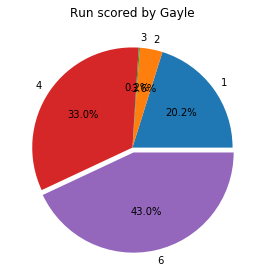

In [17]:
#creating pie chart run scored by Gayle
slices=[919,166,9,1504,1962]
labels=[1,2,3,4,6]
explode=[0,0,0,0,0.05]
plt.pie(slices,labels=labels,autopct="%1.1f%%",explode=explode)
plt.title("Run scored by Gayle")
plt.tight_layout()
plt.show()


# Anaylsing Team performance 

In [36]:
#Replacing the Team Names with their abbreviations
ipl_data["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [72]:
Teams={'Sunrisers Hyderabad':"SRH",
      'Royal Challengers Bangalore':"RCB",
       'Mumbai Indians':"MI",
      'Rising Pune Supergiant':"RPS",
      'Gujarat Lions':"GL",
       'Kolkata Knight Riders':"KKR",
      'Kings XI Punjab':"KIXP",
      'Delhi Daredevils':"DD",
       'Chennai Super Kings':"CSK", 
      'Rajasthan Royals':"RR",
      'Deccan Chargers':"DeC",
       'Kochi Tuskers Kerala':"KTK",
      'Pune Warriors':"PW"
      , 'Rising Pune Supergiants':"RPS",
       'Delhi Capitals':"DC"}

In [73]:
ipl_data["batting_team"]=ipl_data["batting_team"].map(Teams)
ipl_data["bowling_team"]=ipl_data["bowling_team"].map(Teams)


In [24]:
ipl_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Score Distribution For Teams by Innings

In [29]:
ipl_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [31]:
#creating groupby of matchid inning battingtream 
runs=ipl_data.groupby(['match_id','inning','batting_team'])[["total_runs"]].sum()
runs

total_runs
match_id inning batting_team            
1        1      SRH                  207
         2      RCB                  172
2        1      MI                   184
         2      RPS                  187
3        1      GL                   183
...                                  ...
11413    2      DC                   170
11414    1      DC                   155
         2      CSK                  162
11415    1      MI                   152
         2      CSK                  157

[1528 rows x 1 columns]

In [32]:
#reseting the index
runs=ipl_data.groupby(['match_id','inning','batting_team'])[["total_runs"]].sum().reset_index()
runs

,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GL,183
...,...,...,...,...
1523,11413,2,DC,170
1524,11414,1,DC,155
1525,11414,2,CSK,162
1526,11415,1,MI,152


In [39]:
#runs scored in inning1
inning1=runs[runs["inning"]==1]
inning1.head()

,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
2,2,1,MI,184
4,3,1,GL,183
6,4,1,RPS,163
8,5,1,RCB,157


In [42]:
#runs scored in inning2
inning2=runs[runs["inning"]==2]
inning2.head()

,match_id,inning,batting_team,total_runs
1,1,2,RCB,172
3,2,2,RPS,187
5,3,2,KKR,184
7,4,2,KIXP,164
9,5,2,DD,142


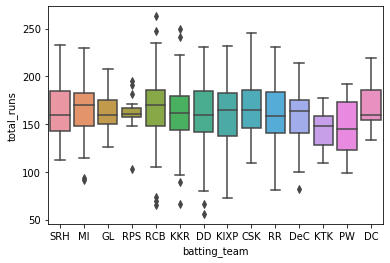

In [47]:
#seeing runs scroed by each team in inning1
sns.boxplot(x="batting_team",y="total_runs",data=inning1)

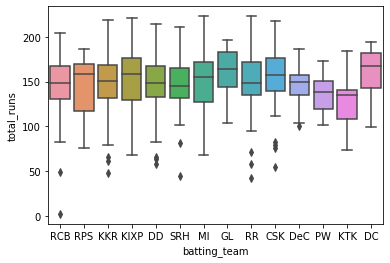

In [48]:
#seeing runs scroed by each team in inning2
sns.boxplot(x="batting_team",y="total_runs",data=inning2)

# how many times teams scores more than 200

In [62]:
highscore=ipl_data.groupby(['match_id','inning','batting_team','bowling_team'])["total_runs"].sum().reset_index()
highscore.head()


,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183


In [68]:
score_200=highscore[highscore["total_runs"]>=200]
score_200


,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KIXP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1475,11326,2,KKR,RCB,219
1488,11333,1,RCB,KIXP,213
1498,11338,1,KKR,MI,241
1499,11338,2,MI,KKR,204


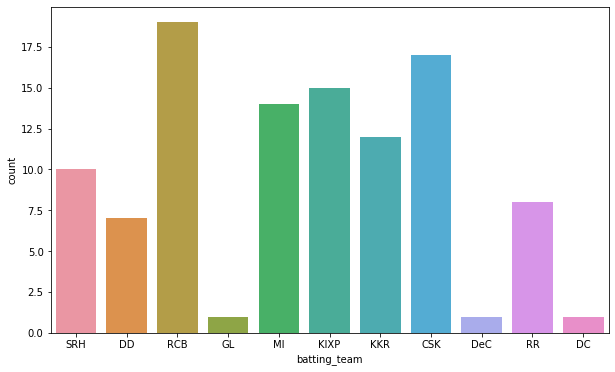

In [64]:
#teams made 200plus score in their 1st inning 
plt.figure(figsize=(10,6))
sns.countplot(score_200['batting_team'])

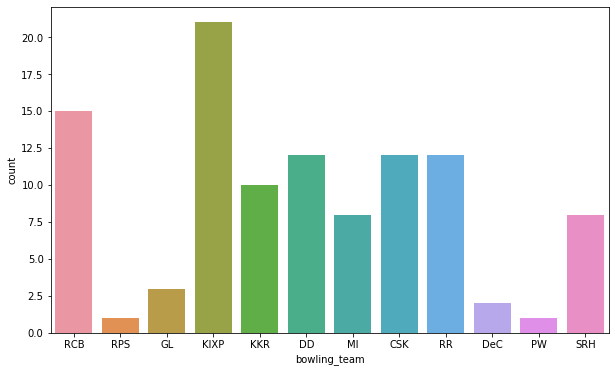

In [65]:
#teams made 200plus score in their 2st inning 
plt.figure(figsize=(10,6))
sns.countplot(score_200['bowling_team'])

# Batsman Comparison

In [75]:
#No of balls faced by batsman 
balls=ipl_data.groupby(ipl_data["batsman"])['ball'].count().reset_index()
balls



,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5
...,...,...
511,YV Takawale,183
512,Yashpal Singh,67
513,Younis Khan,7
514,Yuvraj Singh,2207


In [77]:
#run scored by each batsmans
runs=ipl_data.groupby(ipl_data["batsman"])["batsman_runs"].sum().reset_index()
runs.columns=["batsman",'runs']
runs

,batsman,runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
511,YV Takawale,192
512,Yashpal Singh,47
513,Younis Khan,3
514,Yuvraj Singh,2765


In [80]:
#no of fours by each batsmans
four=ipl_data[ipl_data["batsman_runs"]==4]
r_4=four.groupby("batsman")["batsman_runs"].count().reset_index()
r_4.columns=["batsman","4s"]
r_4


,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Hales,13
...,...,...
405,YK Pathan,264
406,YV Takawale,26
407,Yashpal Singh,5
408,Yuvraj Singh,218


In [81]:
#no of sixs by each batsmans
six=ipl_data[ipl_data["batsman_runs"]==6]
r_6=six.groupby("batsman")["batsman_runs"].count().reset_index()
r_6.columns=["batsman","6s"]
r_6


,batsman,6s
0,A Ashish Reddy,15
1,A Choudhary,1
2,A Flintoff,2
3,A Hales,6
4,A Mishra,5
...,...,...
331,Y Venugopal Rao,37
332,YK Pathan,161
333,YV Takawale,3
334,Yuvraj Singh,149


In [92]:
#combing all datasets 
player_stats=pd.concat([runs,balls.iloc[:,1],r_4.iloc[:,1],r_6.iloc[:,1]],axis=1)
player_stats

,batsman,runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,6.0
4,A Dananjaya,4,5,13.0,5.0
...,...,...,...,...,...
511,YV Takawale,192,183,NaN,NaN
512,Yashpal Singh,47,67,NaN,NaN
513,Younis Khan,3,7,NaN,NaN
514,Yuvraj Singh,2765,2207,NaN,NaN


In [98]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   batsman  516 non-null    object 
 1   runs     516 non-null    int64  
 2   ball     516 non-null    int64  
 3   4s       410 non-null    float64
 4   6s       336 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 18.2+ KB


In [100]:
player_stats["strike_rate"]=(player_stats["runs"]/player_stats["ball"])*100
player_stats.head()

,batsman,runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,142.857143
1,A Chandila,4,7,7.0,1.0,57.142857
2,A Chopra,53,75,1.0,2.0,70.666667
3,A Choudhary,25,20,5.0,6.0,125.000000
4,A Dananjaya,4,5,13.0,5.0,80.000000


In [101]:
player['strike_rate']=player['runs']/player['ball']
player.head()


,batsman,runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,1.428571
1,A Chandila,4,7,7.0,1.0,0.571429
2,A Chopra,53,75,1.0,2.0,0.706667
3,A Choudhary,25,20,5.0,6.0,1.250000
4,A Dananjaya,4,5,13.0,5.0,0.800000


In [102]:
player_stats.tail()

,batsman,runs,ball,4s,6s,strike_rate
511,YV Takawale,192,183,NaN,NaN,104.918033
512,Yashpal Singh,47,67,NaN,NaN,70.149254
513,Younis Khan,3,7,NaN,NaN,42.857143
514,Yuvraj Singh,2765,2207,NaN,NaN,125.283190
515,Z Khan,117,141,NaN,NaN,82.978723


In [104]:
player_stats.isna().sum()

batsman          0
runs             0
ball             0
4s             106
6s             180
strike_rate      0
dtype: int64

In [106]:
player_stats['4s'].fillna(0,inplace=True)
player_stats['6s'].fillna(0,inplace=True)
player_stats

,batsman,runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,142.857143
1,A Chandila,4,7,7.0,1.0,57.142857
2,A Chopra,53,75,1.0,2.0,70.666667
3,A Choudhary,25,20,5.0,6.0,125.000000
4,A Dananjaya,4,5,13.0,5.0,80.000000
...,...,...,...,...,...,...
511,YV Takawale,192,183,0.0,0.0,104.918033
512,Yashpal Singh,47,67,0.0,0.0,70.149254
513,Younis Khan,3,7,0.0,0.0,42.857143
514,Yuvraj Singh,2765,2207,0.0,0.0,125.283190


In [107]:
grp=ipl_data.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,RCB,6
1,1,BCJ Cutting,SRH,16
2,1,CH Gayle,RCB,32
3,1,DA Warner,SRH,14
4,1,DJ Hooda,SRH,16
...,...,...,...,...
11289,11415,RD Chahar,MI,0
11290,11415,RG Sharma,MI,15
11291,11415,SK Raina,CSK,9
11292,11415,SN Thakur,CSK,2


In [108]:
max=grp.groupby(['batsman'])['batsman_runs'].max().reset_index()
max.columns=['batsman','max_runs']
max

,batsman,max_runs
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Dananjaya,4
...,...,...
511,YV Takawale,45
512,Yashpal Singh,20
513,Younis Khan,3
514,Yuvraj Singh,83


In [109]:
player_stats2=pd.concat([player_stats,max.iloc[:,1:3]],axis=1)
player_stats2

,batsman,runs,ball,4s,6s,strike_rate,max_runs
0,A Ashish Reddy,280,196,16.0,15.0,142.857143,36
1,A Chandila,4,7,7.0,1.0,57.142857,4
2,A Chopra,53,75,1.0,2.0,70.666667,24
3,A Choudhary,25,20,5.0,6.0,125.000000,15
4,A Dananjaya,4,5,13.0,5.0,80.000000,4
...,...,...,...,...,...,...,...
511,YV Takawale,192,183,0.0,0.0,104.918033,45
512,Yashpal Singh,47,67,0.0,0.0,70.149254,20
513,Younis Khan,3,7,0.0,0.0,42.857143,3
514,Yuvraj Singh,2765,2207,0.0,0.0,125.283190,83


# Top 10 Batsman

In [123]:
max_runs=ipl_data.groupby(["batsman"])["batsman_runs"].sum()
top_scorer_batsman=max_runs.sort_values(ascending=False)[:10]
top_scorer_batsman

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

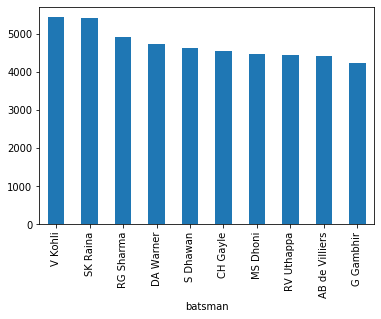

In [131]:
top_scorer_batsman=max_runs.sort_values(ascending=False)[:10].plot.bar()


# Top Individual Scores

In [132]:
ipl_data.groupby(["match_id","batsman",'batting_team'])["batsman_runs"].sum().reset_index().sort_values(by='batsman_runs', ascending=False).head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
10149,7935,RR Pant,DD,130
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KIXP,122
10417,7953,SR Watson,CSK,121
